# 利用Python绘制相关性热力图

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#相关性简介" data-toc-modified-id="相关性简介-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>相关性简介</a></span></li><li><span><a href="#使用matshow实现" data-toc-modified-id="使用matshow实现-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>使用matshow实现</a></span></li><li><span><a href="#使用Seaborn实现" data-toc-modified-id="使用Seaborn实现-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>使用Seaborn实现</a></span></li></ul></div>

## 相关性简介 

相关系数是研究变量之间的`线性相关`程度的量。简单相关系数或线性相关系数，一般用r表示。<br>
定义公式： $\gamma(X,Y)=\frac{Cov(X,Y)}{\sqrt{Var[X]Var[Y]}}$<br>
Cov(X,Y)表示X,Y的`协方差`，Var\[X\]为X的`方差`，Var\[Y\]为Y的`方差`。
+ 协方差：两个变量总体误差的期望
+ 方差：每一个观察值与总体数之间的差异

In [1]:
import seaborn as sns
import pandas as pd
iris = pd.read_csv('../data/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 使用matshow实现 

使用DataFrame.corr()实现计算数据帧的线性相关性计算。

In [2]:
import matplotlib.pyplot as plt

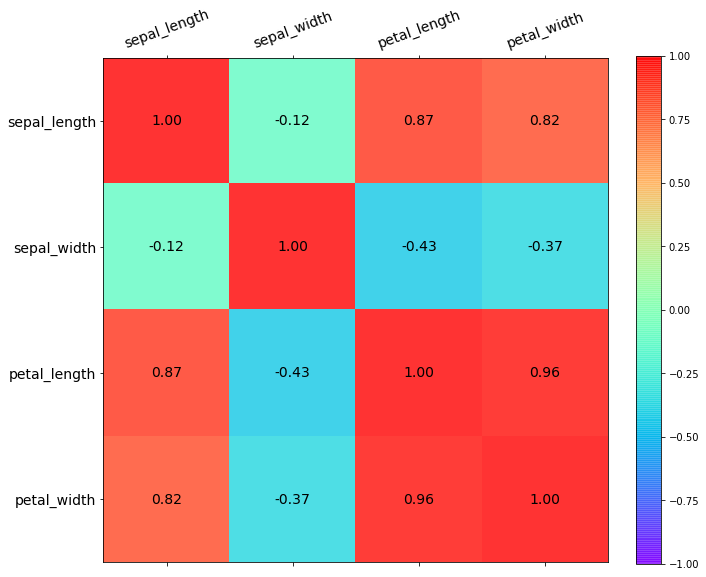

In [3]:
qr = iris.corr()
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
p = ax.matshow(iris.corr(), vmin=-1, vmax=1, alpha=0.8, cmap='rainbow')
ax.set_xticks(range(len(qr)))
ax.set_xticklabels(qr.columns, fontsize=14, rotation=20)
ax.set_yticks(range(len(qr)))
ax.set_yticklabels(qr.columns, fontsize=14)

for i in range(len(qr)):
    for j in range(len(qr)):
        ax.text(i, j, '{:.2f}'.format(qr.iloc[i, j]), c='k', fontsize=14, ha='center', va='center')
        
cb = plt.colorbar(p, fraction=0.0455)

plt.show()

## 使用Seaborn实现

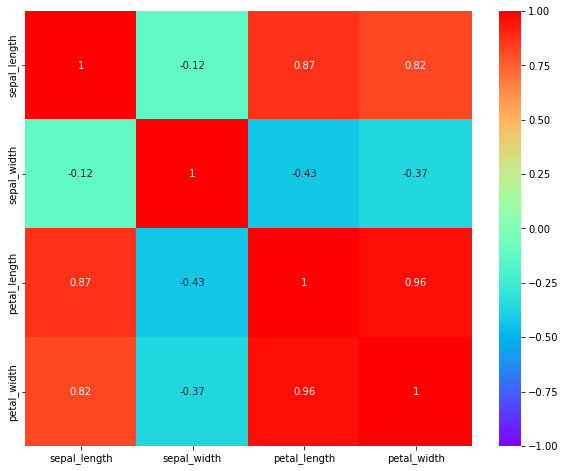

In [4]:
fig = plt.figure(figsize=(10, 8))
ax = sns.heatmap(qr, vmin=-1.0, vmax=1.0, cmap='rainbow', annot=True, cbar_kws=
                 {'ticks': [-1+i*.25 for i in range(9)]})
# 调整Yticklabels的参数
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(qr.columns, va='center')
plt.show()